<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=118951210" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Feb-12


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

### Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

### Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 168
-rw-r--r-- 1 nobody nogroup 171457 Feb 12 13:47 'Shark Tank US dataset.csv'

There are 991 rows and 38 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number  Episode Number  Pitch Number                 Startup Name  \
0              1               1             1             Ava the Elephant   
1              1               1             2        Mr. Tod's Pie Factory   
2              1               1             3                      Wispots   
3              1               1             4  College Foxes Packing Boxes   
4              1               1             5                    Ionic Ear   

            Industry Business Description Pitchers Gender Pitchers State  \
0  Health / Wellness  Baby and Child Care          Female             GA   
1  Food and Beverage       Specialty Food            Male             NJ   
2  Business Services    Consumer Services            Male             NC   
3   Lifestyle / Home    Consumer Services            Male             FL   
4    Software / Tech            Novelties            Male             MN   

  Pitchers City           Entrepreneur Names  \
0       Atlanta              Tiffany Krumins   
1      Somerset                   Tod Wilson   
2          Cary               Kevin Flannery   
3         Tampa  Nick Friedman, Omar Soliman   
4      St. Paul               Darrin Johnson   

                               website  Multiple Entrepreneurs  \
0       http://www.avatheelephant.com/                     0.0   
1                  http://whybake.com/                     0.0   
2              http://www.wispots.com/                     0.0   
3  http://collegehunkshaulingjunk.com/                     0.0   
4                                  NaN                     0.0   

  Original Ask Amount  Original Offered Equity Valuation Requested  Got Deal  \
0            50,000                       15.0             333,333         1   
1             460,000                     10.0           4,600,000         1   
2           1,200,000                     10.0          12,000,000         0   
3             250,000                     25.0           1,000,000         0   
4           1,000,000                     15.0           6,666,667         0   

  Total Deal Amount  Total Deal Equity Deal Valuation  \
0          50,000                 55.0       90,909     
1           460,000               50.0        920,000   
2               NaN                NaN            NaN   
3               NaN                NaN            NaN   
4               NaN                NaN            NaN   

   Number of sharks in deal  Royalty Deal  Loan  BarbaraCorcoran Offered  \
0                       1.0           NaN   NaN                      1.0   
1                       2.0           NaN   NaN                      1.0   
2                       NaN           NaN   NaN                      NaN   
3                       NaN           NaN   NaN                      NaN   
4                       NaN           NaN   NaN                      NaN   

   MarkCuban Offered  LoriGreiner Offered  RobertHerjavec Offered  \
0                NaN                  NaN                     NaN   
1                NaN                  NaN                     NaN   
2                NaN                  NaN                     NaN   
3                NaN                  NaN                     NaN   
4                NaN                  NaN                     NaN   

   DaymondJohn Offered  KevinOLeary Offered  Guest Offered  \
0                  NaN                  NaN            NaN   
1                  1.0                  NaN            NaN   
2                  NaN                  NaN            NaN   
3                  NaN                  NaN            NaN   
4                  NaN                  NaN            NaN   

   BarbaraCorcoran Present  MarkCuban Present  LoriGreiner Present  \
0                      1.0                0.0                  0.0   
1                      1.0                0.0                  0.0   
2                      1.0                0.0                  0.0   
3                      1.0          

In [6]:
shark_tank.tail(10).T

981             982                983  \
Season Number                         11              11                 11   
Episode Number                        22              22                 23   
Pitch Number                         982             983                984   
Startup Name                   Tough Tie         DadWare             Salted   
Industry                  Fashion/Beauty  Fashion/Beauty  Business Services   
Business Description                 NaN             NaN                NaN   
Pitchers Gender                     Male            Male               Male   
Pitchers State                       NaN             NaN                NaN   
Pitchers City                        NaN             NaN                NaN   
Entrepreneur Names                   NaN             NaN                NaN   
website                              NaN             NaN                NaN   
Multiple Entrepreneurs               NaN             NaN                NaN   
Original Ask Amount              100,000         100,000            500,000   
Original Offered Equity             15.0            20.0                5.0   
Valuation Requested              666,667         500,000         10,000,000   
Got Deal                               1               0                  0   
Total Deal Amount                100,000             NaN                NaN   
Total Deal Equity                   35.0             NaN                NaN   
Deal Valuation                   285,714             NaN                NaN   
Number of sharks in deal             1.0             NaN                NaN   
Royalty Deal                         NaN             NaN                NaN   
Loan                                 NaN             NaN                NaN   
BarbaraCorcoran Offered              NaN             NaN                NaN   
MarkCuban Offered                    NaN             NaN                NaN   
LoriGreiner Offered                  NaN             NaN                NaN   
RobertHerjavec Offered               1.0             NaN                NaN   
DaymondJohn Offered                  NaN             NaN                NaN   
KevinOLeary Offered                  NaN             NaN                NaN   
Guest Offered                        NaN             NaN                NaN   
BarbaraCorcoran Present              NaN             NaN                NaN   
MarkCuban Present                    NaN             NaN                NaN   
LoriGreiner Present                  NaN             NaN                NaN   
RobertHerjavec Present               NaN             NaN                NaN   
DaymondJohn Present                  NaN             NaN                NaN   
KevinOLeary Present                  NaN             NaN                NaN   
KevinHarrington Present              NaN             NaN                NaN   
Guest                                NaN             NaN                NaN   
Notes                                NaN             NaN                NaN   

                                     984                   985  \
Season Number                         11                    11   
Episode Number                        23                    23   
Pitch Number                         985                   986   
Startup Name                  MC Squares  Slate Chocolate Milk   
Industry                  Lifestyle/Home     Food and Beverage   
Business Description                 NaN                   NaN   
Pitchers Gender                     Male                  Male   
Pitchers State                       NaN                   NaN   
Pitchers City                        NaN                   NaN   
Entrepreneur Names                   NaN                   NaN   
website                              NaN                   NaN   
Multiple Entrepreneurs               NaN                   NaN   
Original Ask Amount              300,000               400,000   
Original Offered Equity        

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())


In [8]:
shark_tank.sample(10)

Season Number  Episode Number  Pitch Number            Startup Name  \
836             10               9           837         Sproing Fitness   
824             10               6           825          Vade Nutrition   
577              7              21           578               IlumiBowl   
108              3               3           109          You Smell Soap   
919             11               7           920  The Yard Milkshake Bar   
255              4              25           256    Stella Valle Jewelry   
844             10              11           845             Kitty Kasas   
58               1              13            59       Captain Ice Cream   
428              6              13           429                 Doorman   
642              8               8           643                    Toor   

                        Industry         Business Description Pitchers Gender  \
836  Fitness / Sports / Outdoors         redesigned treadmill            Male   
824            Food and Beverage               protein shakes      Mixed Team   
577             Lifestyle / Home                          nan            Male   
108             Fashion / Beauty  Personal Care and Cosmetics          Female   
919            Food and Beverage                          nan      Mixed Team   
255             Fashion / Beauty          Women's Accessories          Female   
844                 Pet Products                   cat houses      Mixed Team   
58             Food and Beverage               Specialty Food            Male   
428             Lifestyle / Home            Consumer Services            Male   
642             Lifestyle / Home                          nan            Male   

    Pitchers State  Pitchers City                Entrepreneur Names  \
836             IL            NaN                               NaN   
824            NaN            NaN                               NaN   
577            NaN            NaN                               NaN   
108             TX         Austin                     Megan Cummins   
919            NaN            NaN                               NaN   
255             NJ   Hillsborough  Paige Dellavalle and Ashley Jung   
844            NaN            NaN                               NaN   
58              CA       Monrovia                        Tim Gavern   
428             CA  San Francisco                      Zander Adell   
642             TX            NaN                               NaN   

                          website  Multiple Entrepreneurs Original Ask Amount  \
836                           NaN                    <NA>             500,000   
824                           NaN                    <NA>             250,000   
577                           NaN                    <NA>             100,000   
108  http://www.yousmellsoap.com/                       0            55,000     
919                           NaN                    <NA>             400,000   
255    http://www.stellavalle.com                       1             150,000   
844                           NaN                    <NA>             200,000   
58                            NaN                       0            48,000     
428         http://www.doorman.co                       0             250,000   
642                           NaN                    <NA>             500,000   

     Original Offered Equity Valuation Requested  Got Deal Total Deal Amount  \
836                      8.0           6,250,000         0               NaN   
824                     10.0           2,500,000         1           700,000   
577                     15.0             666,667         1           100,000   
108                     20.0             275,000         1          50,000     
919                     10.0           4,000,000         1           400,000   
255                     25.0             600,000         1           150,000   
844                     20.0           1,0

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season Number             991 non-null    Int32  
 1   Episode Number            991 non-null    Int32  
 2   Pitch Number              991 non-null    Int32  
 3   Startup Name              991 non-null    object 
 4   Industry                  991 non-null    object 
 5   Business Description      991 non-null    object 
 6   Pitchers Gender           991 non-null    object 
 7   Pitchers State            734 non-null    object 
 8   Pitchers City             495 non-null    object 
 9   Entrepreneur Names        423 non-null    object 
 10  website                   432 non-null    object 
 11  Multiple Entrepreneurs    495 non-null    Int32  
 12  Original Ask Amount       990 non-null    object 
 13  Original Offered Equity   990 non-null    float64
 14  Valuation 

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 11
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 991
Number of unique values in Startup Name - 989
Number of unique values in Industry - 20
Number of unique values in Business Description - 226
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers City - 249
Number of unique values in Entrepreneur Names - 421
Number of unique values in website - 430
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in Original Ask Amount - 72
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 158
Number of unique values in Got Deal - 2
Number of unique values in Total Deal Amount - 63
Number of unique values in Total Deal Equity - 55
Number of unique values in Deal Valuation - 168
Number of unique values in Number of sharks in deal - 5
Number of unique values in 

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

11 seasons 

991 startup companies came for pitching 



In [13]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [14]:
# Types of industries, came for investments
print(shark_tank['Industry'].value_counts())

tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=1200, height=800)
fig.update_yaxes(title_text="")
fig.show()

Food and Beverage              202
Fashion / Beauty               167
Lifestyle / Home               140
Children / Education            93
Fitness / Sports / Outdoors     93
Software / Tech                 60
Pet Products                    43
Health / Wellness               36
Business Services               29
Media / Entertainment           23
Lifestyle/Home                  19
Automotive                      12
Health/Wellness                 12
Green/CleanTech                 11
Travel                          11
Fashion/Beauty                  11
Uncertain / Other                9
Children/Education               9
Fitness/Sports/Outdoors          8
Software/Tech                    3
Name: Industry, dtype: int64


In [15]:
# Gender wise
shark_tank['Pitchers Gender'].value_counts()

Male          584
Female        245
Mixed Team    162
Name: Pitchers Gender, dtype: int64

### 💹 56% companies received offers and 44% startups could not convince Sharks to invest

1    562
0    429
Name: Got Deal, dtype: int64 

1    57%
0    43%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

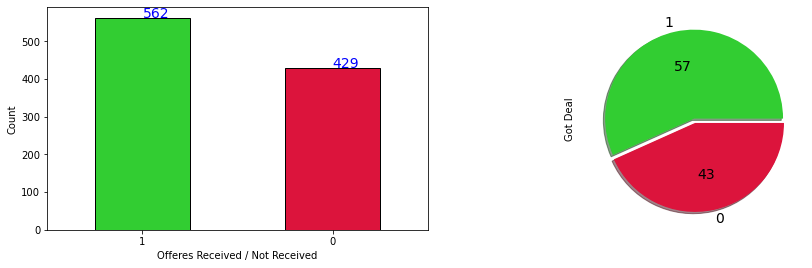

In [16]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offeres Received / Not Received")
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 499 companies received offers & 396 startups could not convince #Sharks to invest.

In [17]:
# Maximum amount requested
#print("Rs.", round(shark_tank["Original Ask Amount"].max()/100), "crores")

In [18]:
# Least amount requested
#print("Rs.", round(shark_tank["Original Ask Amount"].min()*100000))

In [19]:
# Sum of investment amount asked by all startup companies, in Shark Tank
#print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

In [20]:
# Sum of amount invested by all sharks, in Shark Tank
#print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

In [21]:
# Sum of loan/debt amount given by all sharks, in US Shark Tank
#print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

In [22]:
# # Top 20 investments, as per total investment/deal amount (in lakhs)
# print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(20))

# tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:20]
# fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in lakhs)", text=tmpdf['Total Deal Amount'].map(int).map(str) + " lakhs")
# fig.show()

In [23]:
# Top 20 investments, as per total equity/shares percentage
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
Classroom Jams              100.0
CoolWraps                   100.0
Evrewares                   100.0
Hugo's Amazing Tape         100.0
HyConn                      100.0
Moki Doorstep               100.0
RokBlok                     100.0
Turbobaster                 100.0
Wine Balloon                100.0
Remyxx ReKixx Sneakers       80.0
Henry's Humdingers           75.0
Jeska Shoe Company           70.0
Lightfilm                    70.0
The UROClub                  70.0
Readerest Specsecure         65.0
The Last Lid                 60.0
Treasure Chest Pets          60.0
CordaRoy's Bean Bag Beds     58.0
Ava the Elephant             55.0
Bev Buckle                   51.0
Name: Total Deal Equity, dtype: float64


In [24]:
# Startups who got Debt/loan amount
shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Season Number                     Startup Name Original Ask Amount  \
272              5               Rapid Ramen Cooker             300,000   
289              5    Better Life Cleaning Products             400,000   
291              5              Paparazzi Proposals             250,000   
299              5  Grace & Lace Knitted Boot Socks             175,000   
300              5      Yubo Customized Lunch Boxes             150,000   
433              6        Scratch & Grain Baking Co             150,000   
459              6                        Coco Jack             125,000   
520              7                   Savvy Naturals             200,000   
563              7                          Sworkit           1,500,000   
571              7                       BetterBack             750,000   
580              7                            Vengo           2,000,000   
586              7                          Coolbox             500,000   
621              8                           TekDry             500,000   
622              8                 Night Runner 270             250,000   
636              8                       Style Club             500,000   
640              8     Jack's Stands & Marketplaces            50,000     
642              8                             Toor             500,000   
647              8                          Inboard             750,000   
651              8                  Sealed by Santa             150,000   
670              8                   Dbest products             350,000   
684              8           Blentique Wine Company             250,000   
686              8                         Rareform             300,000   
703              8                    Wine & Design             500,000   
733              9                         WaiveCar             500,000   
753              9                       EverlyWell           1,000,000   
754              9                             Mush             300,000   
759              9                          Frywall             100,000   
764              9                          Stasher             400,000   
791              9                    Gunnar Optiks             750,000   
845             10               Makeup Junkie Bags             200,000   
899             11                     Boost Oxygen           1,000,000   
924             11                            Outer             750,000   
931             11                       Flexscreen             800,000   
955             11                           Bohana             200,000   
956             11                 Boho Camper Vans             300,000   
959             11                            Goumi           1,000,000   
974             11                    Mural Painter             300,000   

    Total Deal Amount  Total Deal Equity  
272           300,000              15.00  
289           400,000              17.00  
291           250,000              33.00  
299           175,000              10.00  
300           150,000              20.00  
433           150,000              20.00  
459           125,000              25.00  
520           200,000              40.00  
563         1,500,000              10.00  
571           750,000               7.50  
580         2,000,000              10.00  
586           500,000              15.00  
621           500,000               5.00  
622           200,000              15.00  
636           500,000              22.00  
640               NaN                NaN  
642           500,000              10.00  
647           750,000               4.00  
651           150,000              20.00  
670           350,000              20.00  
684           250,000              10.00  
686           300,000              10.00  
703           500,000              10.00  
733           500,000               2.00  
753         1,000,000               5.00  
754           300,000              1

## 💰 Which shark invested most ?

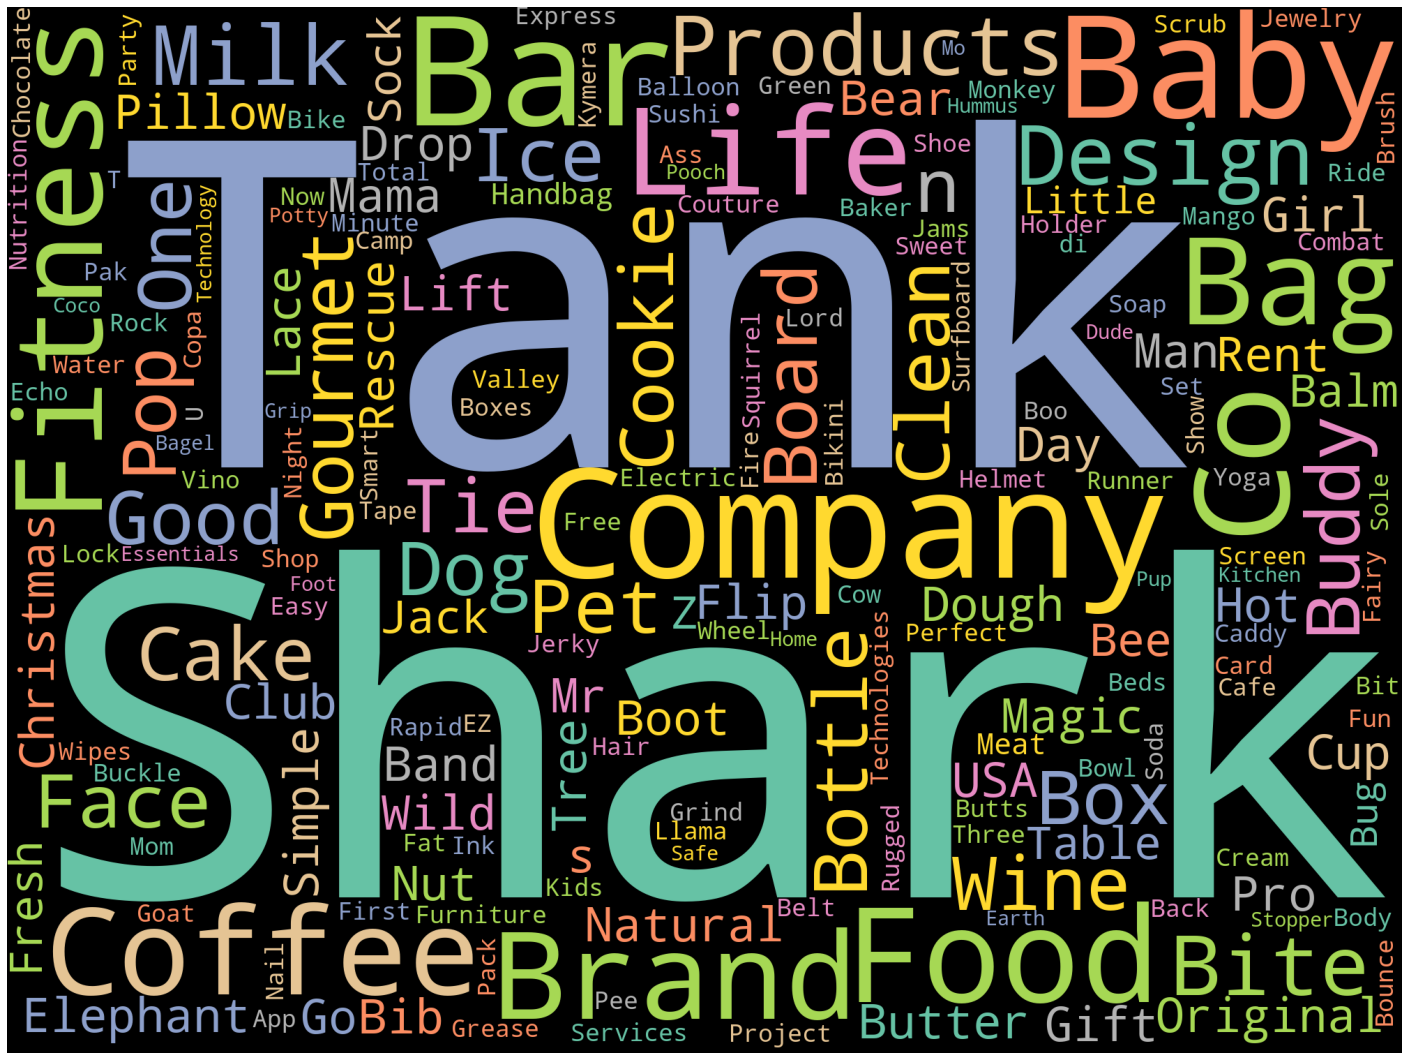

In [25]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

1.0    411
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    22%
3.0     3%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


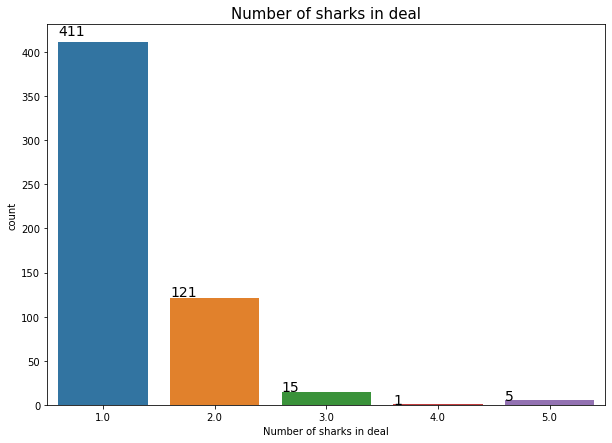

In [26]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in deal", fontsize=15)
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [27]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number    Startup Name Total Deal Amount  Total Deal Equity
6                1  Classroom Jams           250,000              100.0
161              4      Buggy Beds           250,000               25.0
268              5    Breathometer         1,000,000               30.0
514              7         X Craft         1,500,000               25.0
814             10   Cup Board Pro           100,000               20.0


In [28]:
shark_tank['Number of sharks in deal'].value_counts()

1.0    411
2.0    121
3.0     15
5.0      5
4.0      1
Name: Number of sharks in deal, dtype: int64

In [29]:
# US states of pitcher's
print(shark_tank['Pitchers State'].value_counts(), "\n")

CA        207
NY         70
TX         55
FL         47
IL         31
GA         23
UT         23
CO         23
MA         21
PA         20
NC         19
OR         19
OH         19
WA         15
NJ         13
AZ         13
VA         10
MI          9
NV          9
CT          7
DC          6
MO          6
MN          6
TN          5
IN          5
MD          5
VT          4
OK          4
HI          4
WI          4
SC          4
KS          3
MS          3
LA          3
ID          3
RI          3
AR          2
KY          2
AL          2
NE          1
NH          1
IA          1
MT          1
DE          1
AK          1
Canada      1
Name: Pitchers State, dtype: int64 



In [30]:
# Top 20 cities
print(shark_tank['Pitchers City'].value_counts().nlargest(20), "\n")

Los Angeles       41
New York          30
San Francisco     25
Chicago           14
Austin            13
Atlanta           11
Portland          10
San Diego         10
Dallas             8
Houston            5
Boston             5
Miami              5
Tampa              5
Denver             5
Pittsburgh         5
Provo              4
Las Vegas          4
Salt Lake City     4
Washington         4
Philadelphia       4
Name: Pitchers City, dtype: int64 



In [31]:
# Many (70+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name Original Ask Amount Total Deal Amount
15              Gift Card Rescue             150,000           200,000
30                 Soy-Yer-Dough             125,000           300,000
43                  Jump Forward             150,000           600,000
68                      Toygaroo             100,000           200,000
69    First Defense Nasal Screen             500,000           750,000
..                           ...                 ...               ...
910                    Knife Aid             400,000           500,000
925  Mrs. Goldfarb's Unreal Deli             100,000           250,000
937         Wise Pocket Products            30,000            35,000  
940                 Genius Juice             250,000           500,000
944                 Bala Bangles             400,000           900,000

[72 rows x 3 columns]

In [32]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Startup Name","Original Offered Equity","Total Deal Equity"]]

Startup Name  Original Offered Equity  Total Deal Equity
0         Ava the Elephant                     15.0               55.0
1    Mr. Tod's Pie Factory                     10.0               50.0
5           A Perfect Pear                     15.0               50.0
6           Classroom Jams                     10.0              100.0
10             Turbobaster                     35.0              100.0
..                     ...                      ...                ...
984             MC Squares                     10.0               25.0
987   Yellow Leaf Hammocks                      7.0               25.0
988         Dreamland Baby                     10.0               22.5
989           RollinGreens                     10.0               20.0
990       The Mad Optimist                     10.0               20.0

[467 rows x 3 columns]

In [33]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name Valuation Requested Deal Valuation
51   Grease Monkey Wipes             100,000        100,000
60                Qubits             176,471        176,471
78      Ride-On Carry-On             200,000        200,000
85           Daisy Cakes             200,000        200,000
92                HyConn           1,250,000      1,250,000
..                   ...                 ...            ...
908       Bug Bite Thing           1,500,000      1,500,000
915              EZC Pak           2,500,000      2,500,000
933           SlumberPod           2,000,000      2,000,000
954   The Space Traveler             300,300        300,300
961      Critter Pricker             766,667        766,667

[86 rows x 3 columns]

In [34]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name Valuation Requested Deal Valuation
0         Ava the Elephant             333,333       90,909  
1    Mr. Tod's Pie Factory           4,600,000        920,000
6           Classroom Jams           2,500,000        250,000
10             Turbobaster             100,000       35,000  
11        Stress Free Kids           1,250,000        500,000
..                     ...                 ...            ...
969    First Saturday Lime           1,000,000        400,000
973   Fried Green Tomatoes           1,333,333        666,667
974          Mural Painter           2,000,000        666,667
977             UnbuckleMe           1,000,000        500,000
988         Dreamland Baby           1,000,000        444,444

[160 rows x 3 columns]

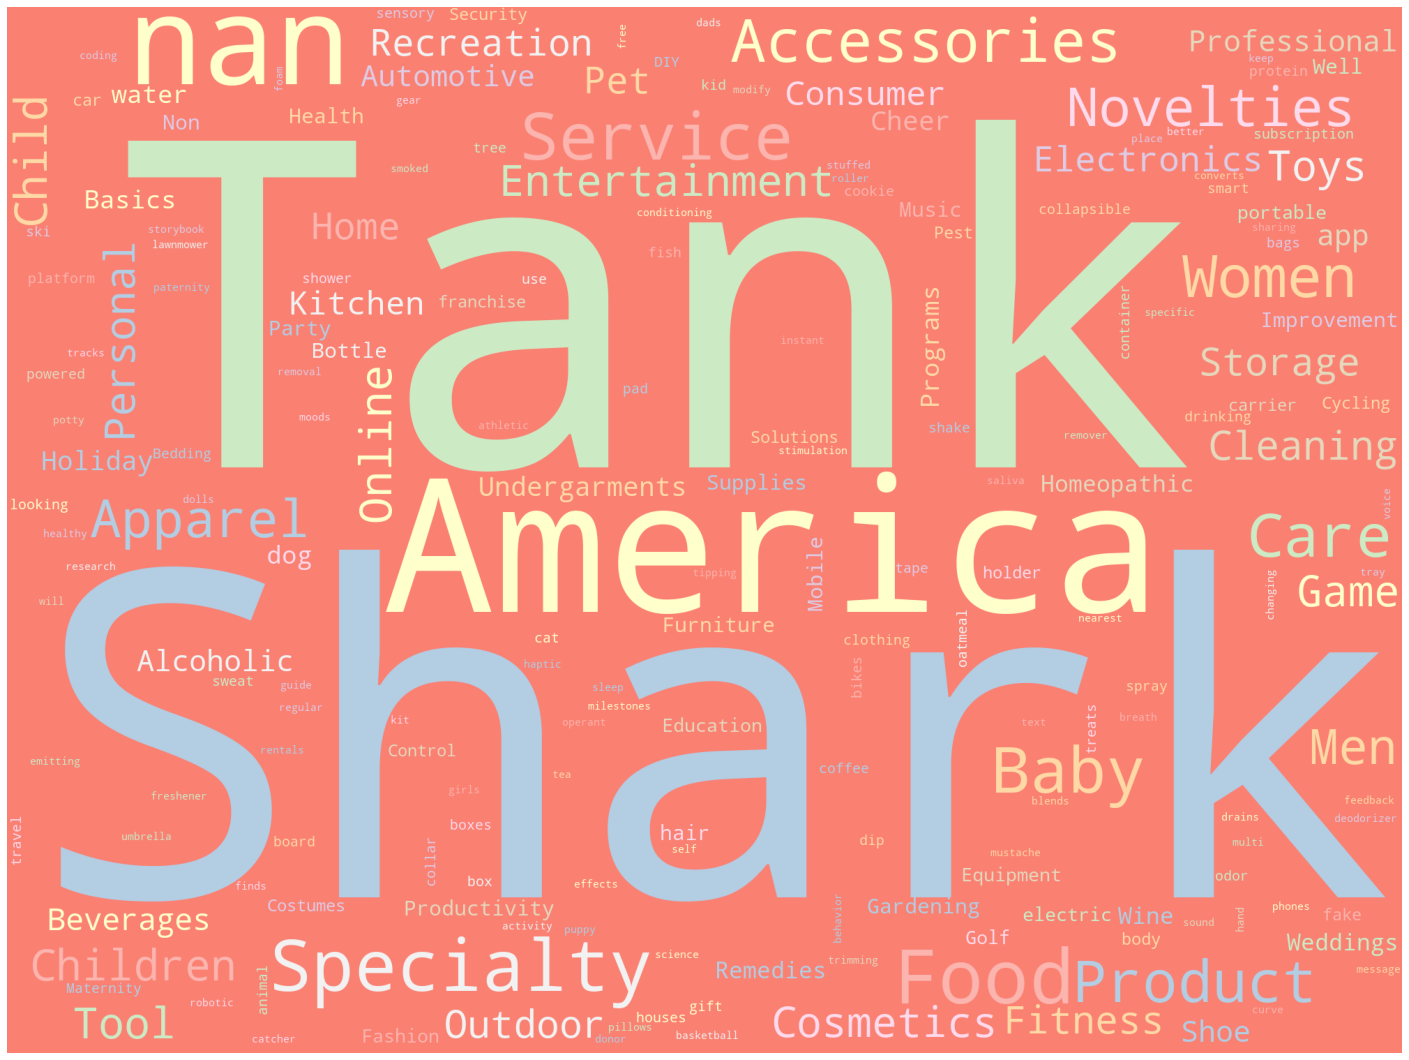

In [35]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [36]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [37]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.2
# seaborn version: 0.11.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.2
seaborn version: 0.11.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows